# Twitter Mood:
I will be analysing a dataset of 1.6m tweets in order to assess when Twitter's is Average Mood is greatest and lowest during a 24 hour period. 

The Dataset of tweets I will be analysing can be found here: https://www.kaggle.com/datasets/kazanova/sentiment140.

In [16]:
import pandas as pd 
import datetime
from datetime import datetime

In [6]:
# Obtain the Dataset
df = pd.read_csv(r'C:\Users\hayes\Documents\Python\training.1600000.processed.noemoticon.csv')
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [7]:
# Clean the DataFrame
clean = df.drop(df.columns[[0, 1, 3, 4]], axis=1)
clean = clean.T.reset_index().T
clean = clean.rename(columns={0:'D&T', 1:'Tweet'})
clean.head()

,D&T,Tweet
index,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
2,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


In [75]:
# Convert String timestamps to DateTime
import dateutil.parser
clean['Date&Time'] = [dateutil.parser.parse(i) for i in clean['D&T']]
clean.set_index('Date&Time', inplace=True)
clean.drop('D&T', axis = 1, inplace=True)

C:\Users\hayes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [91]:
# Calculate polarity for every tweet in dataset 
from textblob import TextBlob
clean['Polarity'] = clean['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment[0]) 

In [96]:
# Group by Time of Day and mean polarity!
grouped = clean['Polarity'].resample('H').mean()
grouped.head()

Date&Time
2009-04-06 22:00:00    0.097207
2009-04-06 23:00:00    0.114079
2009-04-07 00:00:00    0.119094
2009-04-07 01:00:00    0.116438
2009-04-07 02:00:00    0.116874
                         ...   
2009-06-25 06:00:00    0.005326
2009-06-25 07:00:00    0.007610
2009-06-25 08:00:00   -0.024043
2009-06-25 09:00:00   -0.012618
2009-06-25 10:00:00   -0.043969
Freq: H, Name: Polarity, Length: 1909, dtype: float64

In [138]:
# For each hour in each day 
grouped_H = pd.DataFrame(grouped).set_index(grouped.index.time)
value_counts = grouped_H.index.value_counts()
# Sum all instances of a time and divide by value_counts of that time!
grouped_H_average = grouped_H.groupby(grouped_H.index).mean()

# Obtain descriptive statistics for dataset
grouped_H_average.describe()



,Polarity
count,24.000000
mean,0.086592
std,0.013748
min,0.065605
25%,0.074792
50%,0.090025
75%,0.097604
max,0.106546


<Figure size 640x480 with 0 Axes>

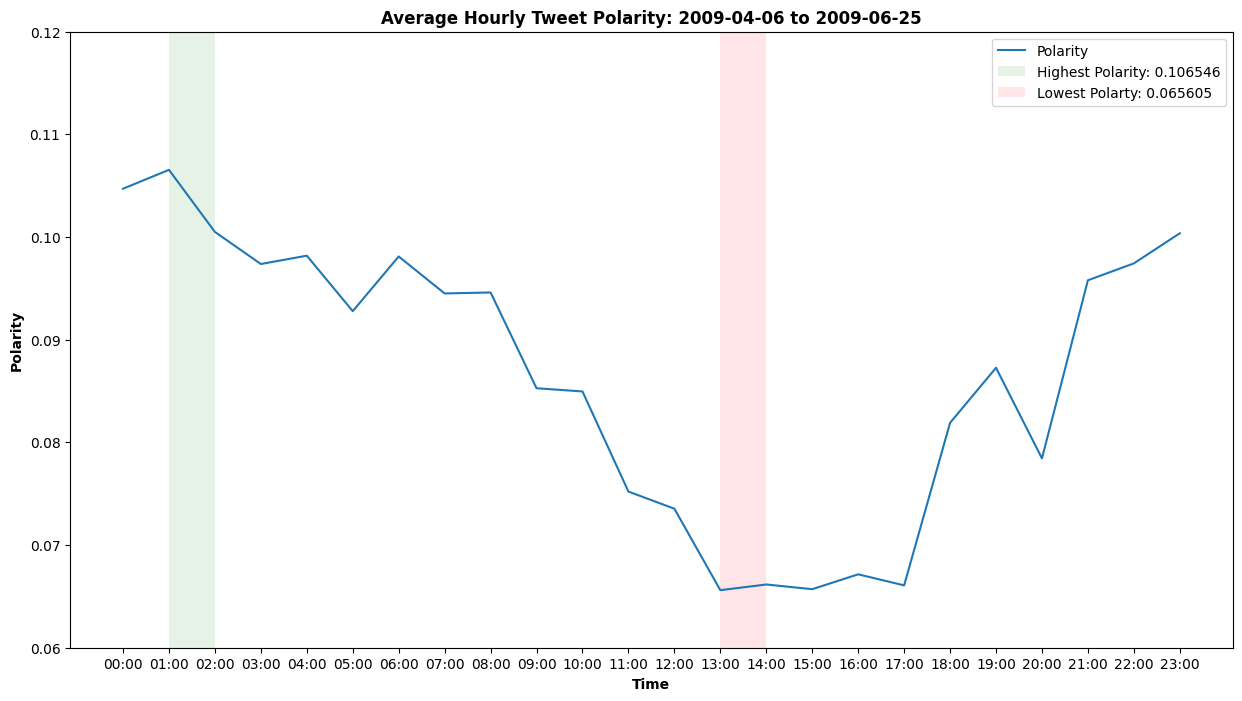

In [207]:
# Plot a timeseries of 24hrs, with polarity on y axis, shade in green the highest polarity hour and the lowest in red.
import matplotlib.pyplot as plt
plt.tight_layout()
grouped_H_average.plot(label = 'Tweet Polarity', x_compat= True, figsize=(15,8))
plt.title('Average Hourly Tweet Polarity: 2009-04-06 to 2009-06-25', fontweight = 'bold')
plt.ylabel('Polarity', fontweight = 'bold')
plt.xlabel('Time', fontweight = 'bold')
plt.ylim(0.06,0.12)
plt.xticks(grouped_H_average.index)
plt.axvspan(grouped_H_average.index[1], grouped_H_average.index[2], facecolor='g', alpha=.10, label = 'Highest Polarity: 0.106546')
plt.axvspan(grouped_H_average.index[13], grouped_H_average.index[14], facecolor='r', alpha=.10, label = 'Lowest Polarty: 0.065605' )
plt.legend(loc = 'best')
plt.show();

# Conclusion:
From this analysis, it can be observed, that during an average 24 hour period between 2009-04-06 and 2009-06-25, twitter users were happiest between 1 and 2AM and were in lowest spirits between 1 and 2PM. This analysis provides an interesting avenue for further study in, the relationship between this period of greatest sentiment occurring in the early hours of the morning: the twitter users' mood is likely infleunced by sleep deprivation in this case. A larger and more extensive study may confirm this, however, intuitively, from this dataset of 1.6m tweets, this appears to be the case. Additionally, the greatest average sentiment is not substantially greater than zero, where the range is measured from -1 to 1; it begs the further question, are twitter users seeing the effects of sleep deprivation reflected in this lower average mood. Scientific literature extolls the value of sleep and it's benefits for mood and mood regulation, could we be seeing a clear reflection of the negative effects of sleeo deprivation upon mood here in this dataset? 